## 基础理论部分

### 0. Can you come up out 3 sceneraies which use AI methods?


##### Ans：广告推送、自动驾驶、商品推荐、机器人自动化

### 1. How do we use Github; Why do we use Jupyter and Pycharm;

##### Ans:Github用来托管代码，可以完成多人合作开发的任务，个人可以通过fork获取他人的代码与文件、通过commit提交对自己与他人的代码修改
#### 使用Jupter可以方便使用各种python工具，即时显示函数图像、统计图表等，模拟实验环境
#### 使用Pycharm来进行中大型python项目的开发

### 2. What's the Probability Model?

##### Ans：概率模型是用来描述不同随机变量之间关系的数学模型，通常情况下刻画了一个或多个随机变量之间的相互非确定性的概率关系。从数学上讲，该模型通常被表达为(Y,P)，其中 Y 是观测集合用来描述可能的观测结果， P 是 Y 对应的概率分布函数集合。若使用概率模型，一般而言需假设存在一个确定的分布P 生成观测数据 Y 。因此通常使用统计推断的办法确定集合 P 中谁是数据产生的原因。

### 3. Can you came up with some sceneraies at which we could use Probability Model?

##### Ans：股票分析、赌博、娃娃机等

### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

##### Ans:使用概率模型可以尽可能模拟现实生活的场景；现实事务的数学抽象过程

### 5. What's the Language Model;

##### Ans:语言模型是通过一个语音识别器来定义一系列的词的东西。一些语言模型还会给每一个词序列一个权重或者概率，来当做这个词序列的language score，来彰显词序列的重要程度。有了语言模型，不符合语法规则或者看着就不像句子的输出就可以直接被排除掉，识别错误的情况也会大大减小。

### 6. Can you came up with some sceneraies at which we could use Language Model?

##### Ans:Siri等聊天机器人的语言生成

### 7. What's the 1-gram language model？

##### Ans:1-gram假设一个语句中的每个单词是独立的不受其他单词存在的影响

### 8. What's the disadvantages and advantages of 1-gram language model？

##### Ans:缺点是不符合现实规律；优点是统计简单

### 9. What't the 2-gram models？

##### Ans:2-gram概率模型是指在一个语句中一个单词的合理性概率受其相邻一个单词的影响，计算合理性概率时要把相邻单词存在的概率计算在内

## 编程实践部分

### 0.设计自己的句子生成器

##### 在火影忍者中一个‘忍者’的语言可以定义为：

In [185]:
first_grammar = '''
ninja => 名词词组 动词词组
名词词组 => 量词 形容词* 名词
形容词* => null | 形容词 形容词*
动词词组 => 动词 名词词组
量词 => 一个 | 这个 | 一个村的 |  一个小队的 | null
名词 => 螺旋丸 | 螺旋手里剑 | 千鸟 | 无限月读 | 须佐能乎 | 神罗天征 | 鸣人 | 佐助 | 辉夜 | 宇智波班 | 佩恩
动词 => 使用 | 击败了 | 打倒了 | 打败了 | 击溃了
形容词 => 火之国的 | 水之国的 | 忍术强的 | 幻术强的 | 体术强的 | null
'''

In [186]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [187]:
create_grammar(first_grammar)

{'ninja': [['名词词组', '动词词组']],
 '名词词组': [['量词', '形容词*', '名词']],
 '形容词*': [['null'], ['形容词', '形容词*']],
 '动词词组': [['动词', '名词词组']],
 '量词': [['一个'], ['这个'], ['一个村的'], ['一个小队的'], ['null']],
 '名词': [['螺旋丸'],
  ['螺旋手里剑'],
  ['千鸟'],
  ['无限月读'],
  ['须佐能乎'],
  ['神罗天征'],
  ['鸣人'],
  ['佐助'],
  ['辉夜'],
  ['宇智波班'],
  ['佩恩']],
 '动词': [['使用'], ['击败了'], ['打倒了'], ['打败了'], ['击溃了']],
 '形容词': [['火之国的'], ['水之国的'], ['忍术强的'], ['幻术强的'], ['体术强的'], ['null']]}

In [188]:
import random
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [189]:
generate(create_grammar(first_grammar),'ninja')

'佩恩打倒了一个村的千鸟'

##### 在海贼王中一个海贼可以这么形容：

In [190]:
second_grammar = '''
poacher => 主 谓 宾
主 => 路飞 | 索隆 | 香吉士
谓 => 吃过 | 拥有
宾* => null | 宾 宾*
宾 => 橡胶果实 | 面子果实 | 响雷果实 | 霸王色霸气 | 武装色霸气 | 见闻色霸气
'''

In [191]:
generate(create_grammar(second_grammar),'poacher')

'香吉士拥有霸王色霸气'

In [192]:
def generate_n(gram, target,n):
    for i in range(n):
        print('{}.:{}'.format(i+1,generate(gram,target)))

In [193]:
generate_n(create_grammar(second_grammar),'poacher',10)

1.:香吉士拥有橡胶果实
2.:香吉士拥有霸王色霸气
3.:索隆拥有见闻色霸气
4.:索隆拥有橡胶果实
5.:索隆拥有响雷果实
6.:路飞拥有霸王色霸气
7.:路飞吃过见闻色霸气
8.:香吉士吃过响雷果实
9.:香吉士吃过见闻色霸气
10.:香吉士拥有响雷果实


In [194]:
generate_n(create_grammar(first_grammar),'ninja',10 )

1.:一个村的幻术强的幻术强的忍术强的佩恩打倒了一个无限月读
2.:一个小队的螺旋手里剑击溃了千鸟
3.:一个小队的幻术强的螺旋手里剑击败了一个小队的佩恩
4.:一个螺旋丸击败了幻术强的水之国的佐助
5.:佐助打败了一个水之国的鸣人
6.:一个体术强的须佐能乎使用螺旋手里剑
7.:一个小队的千鸟打倒了一个辉夜
8.:一个体术强的须佐能乎打败了一个小队的水之国的忍术强的忍术强的无限月读
9.:一个幻术强的忍术强的幻术强的螺旋手里剑击溃了一个小队的无限月读
10.:一个小队的幻术强的忍术强的宇智波班打败了一个小队的水之国的螺旋丸


### 1.使用新数据源完成语言模型的训练

In [195]:
filename1 = 'C:/Users/Pinkman/Desktop/AI_Nlp/Class_1_6.30/train.txt'
store_filename1 = 'C:/Users/Pinkman/Desktop/AI_Nlp/Class_1_6.30/train_clean.txt'

In [196]:
f = open(filename1,'r',encoding = 'UTF-8')
f.readline()

'0 ++$++ disability-insurance ++$++ 法律要求残疾保险吗？ ++$++ Is  Disability  Insurance  Required  By  Law?\n'

In [197]:
def string_clean(string):
    '''用于中文语句的筛选'''
    return string.strip().split('++$++')[2].strip()

In [198]:
def read_txt(filename,store_file):
    '''用于txt文件的读取和文本摘取并保存'''    
    f = open(filename,'r',encoding = 'UTF-8')
    store_f = open(store_file,'w',encoding = 'UTF-8')
    
    for line in f.readlines():
        data = string_clean(line)
        store_f.write(data+'\n')
        
    f.close()
    store_f.close()
        

In [199]:
read_txt(filename1,store_filename1)

In [200]:
f1 = open(store_filename1,'r',encoding='UTF-8')

In [201]:
f1.readline()

'法律要求残疾保险吗？\n'

In [202]:
f1.close()

In [203]:
import re
from collections import Counter

In [204]:
def token(string):
    '''regular expression'''
    return re.findall('\w+',string)

In [205]:
import jieba

In [289]:
f1 = open(store_filename1,'r',encoding='UTF-8')
article = f1.read()
article_clean = ''.join(str(x) for x in article.split('\n'))
article_clean[:100]

'法律要求残疾保险吗？债权人可以在死后人寿保险吗？旅行者保险有租赁保险吗？我可以开一辆没有保险的新车吗？人寿保险的现金转出价值是否应纳税？如何报告年金收入？AAA家庭保险涵盖什么？什么是简单的退休计划？'

In [207]:
a = token(article_clean)
type(a)

list

In [290]:
a[:10]

['法律要求残疾保险吗',
 '债权人可以在死后人寿保险吗',
 '旅行者保险有租赁保险吗',
 '我可以开一辆没有保险的新车吗',
 '人寿保险的现金转出价值是否应纳税',
 '如何报告年金收入',
 'AAA家庭保险涵盖什么',
 '什么是简单的退休计划',
 '社会保险残疾保险是什么',
 '汽车保险是否预付']

In [209]:
TOKEN = []

In [210]:
for sencente in a:
    TOKEN += jieba.cut(sencente)

In [291]:
TOKEN[:10]

['法律', '要求', '残疾', '保险', '吗', '债权人', '可以', '在', '死', '后']

In [292]:
Counter(TOKEN).most_common(20)

[('保险', 5013),
 ('的', 3220),
 ('人寿保险', 2962),
 ('什么', 2677),
 ('吗', 2479),
 ('是', 2344),
 ('我', 2053),
 ('是否', 1862),
 ('可以', 1704),
 ('健康', 1513),
 ('如何', 1294),
 ('医疗保险', 1269),
 ('多少', 1252),
 ('汽车保险', 1189),
 ('在', 913),
 ('覆盖', 848),
 ('你', 827),
 ('有', 775),
 ('残疾', 724),
 ('房主', 714)]

In [213]:
from functools import reduce

In [214]:
from operator import add,mul

In [215]:
words_count = Counter(TOKEN)

In [293]:
words_count.most_common(20)

[('保险', 5013),
 ('的', 3220),
 ('人寿保险', 2962),
 ('什么', 2677),
 ('吗', 2479),
 ('是', 2344),
 ('我', 2053),
 ('是否', 1862),
 ('可以', 1704),
 ('健康', 1513),
 ('如何', 1294),
 ('医疗保险', 1269),
 ('多少', 1252),
 ('汽车保险', 1189),
 ('在', 913),
 ('覆盖', 848),
 ('你', 827),
 ('有', 775),
 ('残疾', 724),
 ('房主', 714)]

#### 高频单词的频率分布图像

In [217]:
frequenices = [f for w,f in words_count.most_common(100)]

In [218]:
x = [i for i in range(100)]

In [219]:
%matplotlib inline

In [220]:
import matplotlib.pyplot as plt

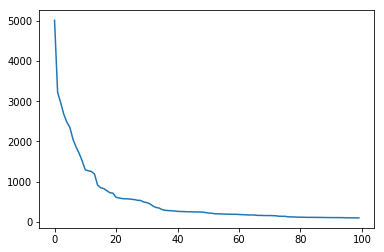

In [221]:
plt.plot(x,frequenices)

#### 使用2—gram语言模型验证语言的合理性

###### 数学公式抽象化：计算相邻单词的概率

In [222]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [223]:
prob_1('我')

0.026804365991226237

In [224]:
TOKEN[:10]

['法律', '要求', '残疾', '保险', '吗', '债权人', '可以', '在', '死', '后']

In [225]:
TOKEN = [str(s) for s in TOKEN]

In [226]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [227]:
TOKEN_2_GRAM[:10]

['法律要求', '要求残疾', '残疾保险', '保险吗', '吗债权人', '债权人可以', '可以在', '在死', '死后', '后人寿保险']

In [228]:
words_count_2 = Counter(TOKEN_2_GRAM)  #Counter函数返回字典对象

In [229]:
def prob_2(word1,word2):
    if word1+word2 in TOKEN_2_GRAM: return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [230]:
prob_2('我们','在')

1.3056534795665231e-05

In [231]:
prob_2('在','吃饭')

1.3056534795665231e-05

###### 计算整个句子存在的合理性概率

In [232]:
def cut(string): return list(jieba.cut(string))

In [233]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_prob = 1
    
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        words_2_prob = prob_2(word,next_)
        sentence_prob *= words_2_prob
        
    return sentence_prob

In [234]:
get_probablity('小明今天抽奖抽到一台苹果手机')

4.954132101817813e-30

In [240]:
need_repared = [generate(create_grammar(first_grammar),'ninja') for _ in range(30)]

In [241]:
need_repared

['千鸟打败了一个村的千鸟',
 '一个小队的忍术强的佐助使用一个村的火之国的火之国的螺旋丸',
 '一个无限月读击溃了一个忍术强的水之国的体术强的螺旋丸',
 '须佐能乎使用水之国的宇智波班',
 '这个忍术强的鸣人击溃了一个小队的神罗天征',
 '一个须佐能乎使用一个小队的佩恩',
 '一个小队的千鸟击败了无限月读',
 '一个村的体术强的佐助打倒了这个螺旋手里剑',
 '这个体术强的幻术强的幻术强的体术强的须佐能乎击溃了一个小队的忍术强的体术强的佩恩',
 '这个佩恩击败了一个佐助',
 '这个体术强的须佐能乎击败了一个村的火之国的火之国的无限月读',
 '一个千鸟打倒了这个辉夜',
 '这个火之国的火之国的水之国的螺旋丸击败了这个辉夜',
 '这个幻术强的辉夜击溃了这个火之国的鸣人',
 '一个宇智波班使用一个须佐能乎',
 '佩恩使用一个螺旋手里剑',
 '这个忍术强的无限月读击败了一个村的宇智波班',
 '体术强的宇智波班击溃了忍术强的火之国的体术强的鸣人',
 '这个火之国的宇智波班打倒了一个火之国的千鸟',
 '这个螺旋丸打倒了一个村的火之国的火之国的佐助',
 '一个小队的佩恩击溃了这个螺旋手里剑',
 '一个体术强的水之国的幻术强的辉夜使用一个螺旋丸',
 '这个幻术强的水之国的水之国的水之国的佩恩击败了一个村的幻术强的鸣人',
 '一个忍术强的鸣人击败了一个螺旋丸',
 '一个小队的神罗天征击溃了一个村的火之国的忍术强的鸣人',
 '一个小队的须佐能乎打败了一个小队的火之国的体术强的鸣人',
 '一个小队的忍术强的螺旋手里剑打倒了一个忍术强的水之国的佩恩',
 '一个村的佐助击溃了这个千鸟',
 '须佐能乎打败了一个村的水之国的忍术强的宇智波班',
 '一个小队的水之国的鸣人击溃了这个鸣人']

In [253]:
def compare_better(need_repared):
    '''比较自动生成相邻句子哪个存在更合理'''
    for i,s1 in enumerate(need_repared[:-1]):
        s2 = need_repared[i+1]
        p1,p2 = get_probablity(s1),get_probablity(s2)
        
        better = s1 if p1 > p2 else s2
        print('{} is more possible'.format(better))
        print('-'*4 + ' {} with probility {}'.format(s1, p1))
        print('-'*4 + ' {} with probility {}'.format(s2, p2))

In [254]:
compare_better(need_repared)

千鸟打败了一个村的千鸟 is more possible
---- 千鸟打败了一个村的千鸟 with probility 3.4678924712724686e-29
---- 一个小队的忍术强的佐助使用一个村的火之国的火之国的螺旋丸 with probility 7.132583878449733e-79
一个无限月读击溃了一个忍术强的水之国的体术强的螺旋丸 is more possible
---- 一个小队的忍术强的佐助使用一个村的火之国的火之国的螺旋丸 with probility 7.132583878449733e-79
---- 一个无限月读击溃了一个忍术强的水之国的体术强的螺旋丸 with probility 4.992808714914813e-78
须佐能乎使用水之国的宇智波班 is more possible
---- 一个无限月读击溃了一个忍术强的水之国的体术强的螺旋丸 with probility 4.992808714914813e-78
---- 须佐能乎使用水之国的宇智波班 with probility 2.9061078120375347e-20
须佐能乎使用水之国的宇智波班 is more possible
---- 须佐能乎使用水之国的宇智波班 with probility 2.9061078120375347e-20
---- 这个忍术强的鸣人击溃了一个小队的神罗天征 with probility 1.3158466382127003e-53
一个须佐能乎使用一个小队的佩恩 is more possible
---- 这个忍术强的鸣人击溃了一个小队的神罗天征 with probility 1.3158466382127003e-53
---- 一个须佐能乎使用一个小队的佩恩 with probility 4.954132101817813e-30
一个须佐能乎使用一个小队的佩恩 is more possible
---- 一个须佐能乎使用一个小队的佩恩 with probility 4.954132101817813e-30
---- 一个小队的千鸟击败了无限月读 with probility 8.445462615185585e-40
一个小队的千鸟击败了无限月读 is more possible
---- 一个小队的千鸟击

In [257]:
need_compared_test = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]
for s in need_compared_test:
    s1,s2 = s.split()
    p1,p2 = get_probablity(s1),get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.4397242002958673e-49
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.4397242002958673e-49
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 3.7943697767822626e-25
---- 真是一只好看的小猫 with probility 2.9061078120375347e-20
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 2.2257879732395474e-15
---- 今晚火锅去吃我 with probility 2.9061078120375347e-20
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 2.2257879732395474e-15
---- 养乐多绿来一杯 with probility 1.7047310087041692e-10


### 2.获得最优质的语言

In [259]:
def generate_best(grammar,target,n):
    sentence_prob_dict = {}
    
    for sentence in [generate(grammar,target) for _ in range(n)]:
            sentence_prob = get_probablity(sentence)
            sentence_prob_dict[sentence] = sentence_prob
    
    return sorted(sentence_prob_dict,key = lambda x:x[1],reverse = True)[0]

In [269]:
generate_best(create_grammar(second_grammar),'poacher',1000)

'路飞拥有武装色霸气'

In [271]:
generate_best(create_grammar(second_grammar),'poacher',100)

'路飞拥有见闻色霸气'

In [273]:
generate_best(create_grammar(first_grammar),'ninja',500)

'千鸟打倒了一个村的火之国的鸣人'

In [283]:
for _ in range(10):
    print(generate_best(create_grammar(second_grammar),'poacher',1000))

路飞吃过面子果实
路飞拥有见闻色霸气
路飞吃过武装色霸气
路飞吃过霸王色霸气
路飞拥有武装色霸气
路飞吃过武装色霸气
路飞拥有见闻色霸气
路飞拥有橡胶果实
路飞拥有霸王色霸气
路飞拥有面子果实


In [282]:
for _ in range(10):
    print(generate_best(create_grammar(first_grammar),'ninja',500))

千鸟使用这个忍术强的火之国的火之国的体术强的幻术强的火之国的体术强的螺旋丸
千鸟打败了一个螺旋丸
千鸟打倒了火之国的螺旋手里剑
千鸟击溃了一个小队的佩恩
无限月读击溃了体术强的须佐能乎
千鸟打败了这个辉夜
千鸟击败了佩恩
千鸟打倒了一个千鸟
千鸟击败了一个村的佩恩
千鸟打败了一个须佐能乎


### Q: 这个模型有什么问题？ 你准备如何提升？

##### Ans:问题：挑选的数据集太小，不能正确的验证合理性；数据集是保险行业相关的问答与自己设定的动漫人物的语法对象不相关；

##### 提升：使用不同性质不同方面的数据集、掌握爬虫后，爬取大量的相关数据集供测试；了解其他的概率模型并分析出利弊，挑选适合实验数据集的模型